<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/Custom_Datasets_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Custom Datasets


### Importing Modules and Setting Up Device-Agnostic Code

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [4]:
!nvidia-smi

Sat Aug 26 05:00:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    13W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Getting Data

In [5]:
import requests
import zipfile
from pathlib import  Path
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exist")
else:
  print(f"{image_path} does not exist")
  image_path.mkdir(parents=True,exist_ok=True)
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading")
  f.write(request.content)

#Unzip Data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza,steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist
Downloading
Unzipping pizza,steak and sushi data...


### Becoming one with the data

In [6]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2023-08-26 05:00:28--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2023-08-26 05:00:28 (108 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [7]:
from helper_functions import walk_through_dir

In [8]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [9]:
train_dir = image_path/"train"
test_dir = image_path/"test"

### Visualizing and Image

In [10]:
import random
from PIL import Image

def plot_random_sample(image_path):
  image_path_list = list(image_path.glob("*/*/*.jpg"))
  random_image_path = random.choice(image_path_list)
  image_class = random_image_path.parent.stem
  img = Image.open(random_image_path)
  plt.imshow(img)
  plt.title(image_class)
  plt.axis(False)

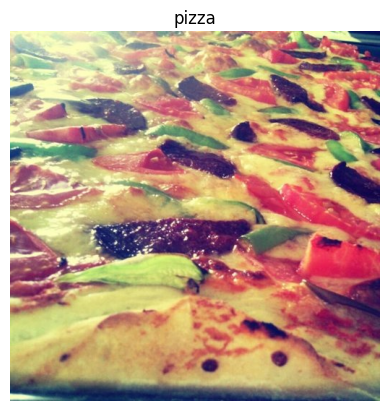

In [11]:
plot_random_sample(image_path)

### Transforming Data

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [13]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

### Loading image using ImageFolder

In [14]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir)

In [15]:
class_names = train_data.classes

### Turning Loaded Images into DataLoader

In [16]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(train_data,batch_size = BATCH_SIZE,num_workers=os.cpu_count(),shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,num_workers=os.cpu_count())

In [17]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d6d71b6fd30>,
 <torch.utils.data.dataloader.DataLoader at 0x7d6d71b6f820>)

In [18]:
len(train_dataloader),len(test_dataloader)

(8, 3)

### Other forms of Transforms

In [19]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

### TinyVGG without Data Augmentation

In [20]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])


In [59]:
train_data = datasets.ImageFolder(root=train_dir,transform=simple_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=simple_transform)

In [60]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(train_data,batch_size = BATCH_SIZE,num_workers=os.cpu_count(),shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,num_workers=os.cpu_count())

In [224]:
from torch import nn
class TinyVGGModelV0(nn.Module):
  def __init__(self,in_features,out_features,hidden_units=8):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_features,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    # self.conv_block_3 = nn.Sequential(
    #     nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
    #     nn.ReLU(),
    #     nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
    #     nn.ReLU(),
    #     nn.MaxPool2d(kernel_size=2),
    # )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # nn.Linear(in_features=hidden_units*10*10,out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units*10*10,out_features=out_features)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    # x = self.conv_block_3(x)
    return self.classifier(x)

In [225]:
torch.manual_seed(42)
model_0 = TinyVGGModelV0(3,3,10).to(device)

In [226]:
image,label = next(iter(train_dataloader))

In [227]:
image = image.to(device)

### TorchInfo

In [228]:
#!pip install torchinfo

In [229]:
from torchinfo import summary
summary(model_0,input_size = [32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModelV0                           [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 21, 21]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 21, 21]          --
├─Sequential: 1-2                        [32, 10, 10, 10]          --
│    └─Conv2d: 2-6                       [32, 10, 21, 21]          910
│    └─ReLU: 2-7                         [32, 10, 21, 21]          --
│    └─Conv2d: 2-8                       [32, 10, 21, 21]          910
│    └─ReLU: 2-9                         [32, 10, 21, 21]          --
│    └─MaxPool2d: 2-10                   [32, 10, 10, 10]          --
├─Sequentia

### Train and Test Loop

In [230]:
from timeit import default_timer as timer
def print_train_time(start,end,device):
  total = end-start
  print("Train time on",device,":",total," seconds")
  return total

#### Train Loop

In [231]:
def train_step(
    model:torch.nn.Module,
    dataloader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,accuracy_fn,
    optimizer:torch.optim.Optimizer,device):
  model.train()
  train_loss,train_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss +=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.softmax(y_pred,dim=1).argmax(dim=1)
    train_acc += accuracy_fn(y_pred_class,y)
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss,train_acc

In [232]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device=device
              ):
  model.eval()
  test_loss,test_acc = 0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss+=loss.item()
      test_pred_labels = torch.softmax(test_pred_logits,dim=1).argmax(dim=1)
      test_acc+=accuracy_fn(test_pred_labels,y)
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)
  return test_loss,test_acc

### Loss Fn and Optimizer

In [233]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.0001)

In [234]:
from helper_functions import accuracy_fn

In [235]:
from tqdm.auto import tqdm

def train(
    model:torch.nn.Module,train_dataloader,test_dataloader,
    optimizer,device,loss_fn,accuracy_fn,epochs=5):
  results = {"train_loss":[],"train_acc":[],"test_loss":[],"test_acc":[]}

  for epoch in tqdm(range(1,epochs+1)):
    train_loss,train_acc = train_step(model,train_dataloader,loss_fn,accuracy_fn,optimizer,device)
    test_loss,test_acc = test_step(model,test_dataloader,loss_fn,accuracy_fn)
    print(f"Epoch:: {epoch} | Train loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test acc: {test_acc:.4f} | Test loss: {test_loss:.4f}")

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)
  return results

In [241]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5
model_0 = TinyVGGModelV0(3,10,10).to(device)
model_0_results = train(model_0,train_dataloader,test_dataloader,optimizer,device,loss_fn,accuracy_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:: 1 | Train loss: 2.2733 | Train Acc: 28.1250 | Test acc: 54.1667 | Test loss: 2.2615
Epoch:: 2 | Train loss: 2.2790 | Train Acc: 28.1250 | Test acc: 54.1667 | Test loss: 2.2615
Epoch:: 3 | Train loss: 2.2695 | Train Acc: 40.2344 | Test acc: 54.1667 | Test loss: 2.2615
Epoch:: 4 | Train loss: 2.2698 | Train Acc: 40.2344 | Test acc: 54.1667 | Test loss: 2.2615
Epoch:: 5 | Train loss: 2.2735 | Train Acc: 28.1250 | Test acc: 54.1667 | Test loss: 2.2615


In [242]:
model_0_results

{'train_loss': [2.273341178894043,
  2.279018849134445,
  2.269495338201523,
  2.2698018848896027,
  2.2734865248203278],
 'train_acc': [28.125, 28.125, 40.234375, 40.234375, 28.125],
 'test_loss': [2.2614930470784507,
  2.2614930470784507,
  2.2614930470784507,
  2.2614930470784507,
  2.2614930470784507],
 'test_acc': [54.166666666666664,
  54.166666666666664,
  54.166666666666664,
  54.166666666666664,
  54.166666666666664]}

In [243]:
def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results['train_loss']))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_acc,label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

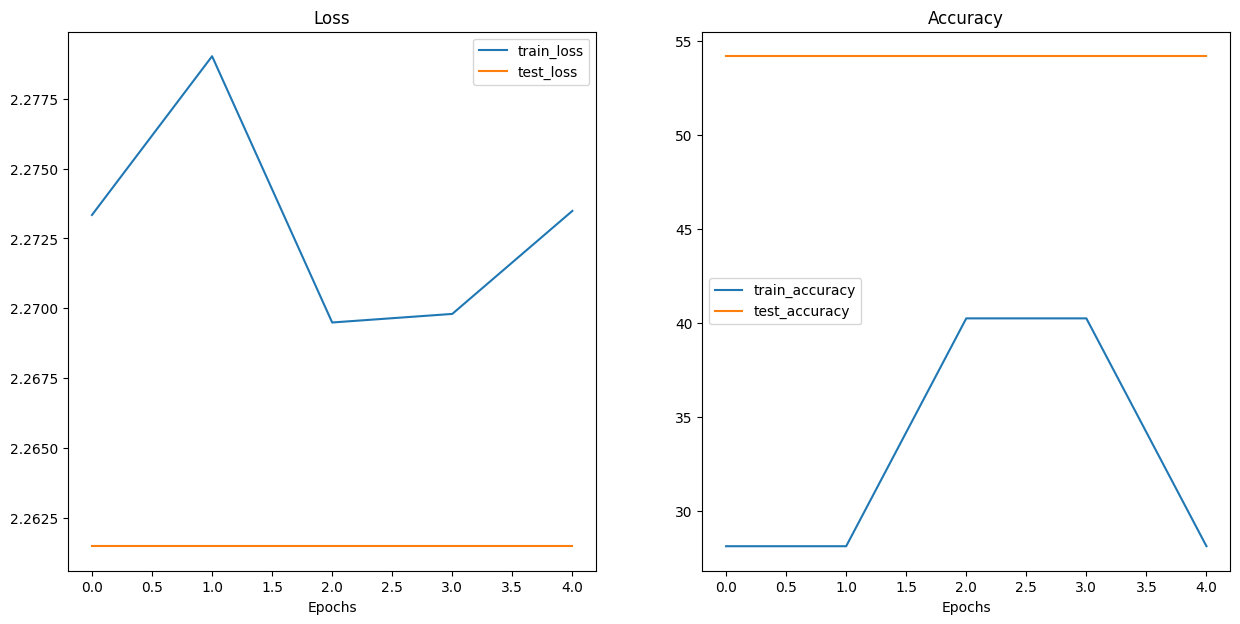

In [244]:
plot_loss_curves(model_0_results)